<a href="https://colab.research.google.com/github/ajeet966/Machinelearning/blob/main/supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [ ]:
data = pd.read_excel('/content/large_old_car_prices.xlsx')
data.head(2)


,car_name,year,mileage,price,transmission,fuel_type,seller_type
0,Nissan,2007,63523,4185,Manual,Hybrid,Dealer
1,Honda,2010,20919,9347,Automatic,Diesel,Dealer


In [ ]:
data.isnull().sum()

car_name        0
year            0
mileage         0
price           0
transmission    0
fuel_type       0
seller_type     0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   car_name      1000 non-null   object
 1   year          1000 non-null   int64 
 2   mileage       1000 non-null   int64 
 3   price         1000 non-null   int64 
 4   transmission  1000 non-null   object
 5   fuel_type     1000 non-null   object
 6   seller_type   1000 non-null   object
dtypes: int64(3), object(4)
memory usage: 54.8+ KB


# **CAR NAME**


In [ ]:
car_name_le = LabelEncoder()
data['car_name'] = car_name_le.fit_transform(data['car_name'])


# ***FUEL TYPE***

In [ ]:
fuel_type_le = LabelEncoder()
data['fuel_type'] = fuel_type_le.fit_transform(data['fuel_type'])

# **SALLER TYPE**

In [ ]:
seller_type = LabelEncoder()
data['seller_type'] = fuel_type_le.fit_transform(data['seller_type'])

# **TRANSMISSION**

In [ ]:
transmission_le = LabelEncoder()
data['transmission'] = fuel_type_le.fit_transform(data['transmission'])


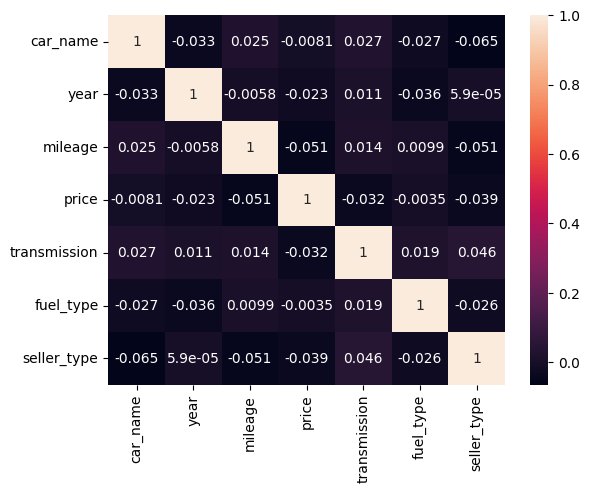

In [ ]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [ ]:
X = data.iloc[:,:-1]
y = data['seller_type']


In [ ]:
from  sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression, Lasso, Ridge, ElasticNet # Capitalize Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,mean_squared_error, mean_absolute_error


In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)*100, lr.score(X_test,y_test)*100

(56.25, 48.0)

In [ ]:
lr1 =Ridge(alpha=5)
lr1.fit(X_train,y_train)
lr1.score(X_train,y_train)*100, lr.score(X_test,y_test)*100

(2.0926001973644692, 48.0)

In [ ]:
lr2 =Lasso(alpha=5)
lr2.fit(X_train,y_train)
lr2.score(X_train,y_train)*100, lr.score(X_test,y_test)*100

(0.0, 48.0)

In [ ]:
lr3 =ElasticNet(alpha=0.5)
lr3.fit(X_train,y_train)
lr3.score(X_train,y_train)*100, lr.score(X_test,y_test)*100

(0.0, 48.0)

In [ ]:
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(X_train,y_train)
dt.score(X_train,y_train)*100, dt.score(X_test,y_test)*100

(78.875, 47.5)

In [ ]:
mean_squared_error(y_test,dt.predict(X_test)), mean_absolute_error(y_test,dt.predict(X_test))

(0.525, 0.525)

In [ ]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
rf.score(X_train,y_train)*100, rf.score(X_test,y_test)*100

(100.0, 48.5)

In [ ]:
mean_squared_error(y_test,rf.predict(X_test)), mean_absolute_error(y_test,rf.predict(X_test))

(0.515, 0.515)

In [ ]:
kn = KNeighborsClassifier(n_neighbors=20)
kn.fit(X_train,y_train)
kn.score(X_train,y_train)*100, kn.score(X_test,y_test)*100

(59.5, 53.5)

In [ ]:
mean_squared_error(y_test,kn.predict(X_test)), mean_absolute_error(y_test,kn.predict(X_test))

(0.465, 0.465)

In [ ]:
sv = SVC()
sv.fit(X_train,y_train)
sv.score(X_train,y_train)*100, sv.score(X_test,y_test)*100

(63.375, 50.0)

In [ ]:
mean_squared_error(y_test,sv.predict(X_test)), mean_absolute_error(y_test,sv.predict(X_test))

(0.5, 0.5)

In [ ]:
X_test

,car_name,year,mileage,price,transmission,fuel_type
521,0.516354,-1.238993,-1.599588,0.299536,0.964625,1.344363
737,0.859675,-0.347723,-1.421035,1.708975,0.964625,-1.388082
740,-0.513608,0.670872,0.158200,-0.356534,-1.036672,-1.388082
660,0.516354,0.670872,0.821332,-0.217374,0.964625,1.344363
411,0.516354,1.689467,1.383507,-0.303159,0.964625,-1.388082
...,...,...,...,...,...,...
408,0.173034,-1.111669,-1.185531,-0.019864,0.964625,-1.388082
332,0.516354,1.052845,1.397555,-1.668249,0.964625,-1.388082
208,-1.200249,1.052845,-0.777539,0.171605,-1.036672,-0.477267
613,0.173034,0.288899,-0.669144,0.435213,-1.036672,-0.477267


In [ ]:
rf.predict([[0.516354,	-1.238993,	-1.599588,	0.299536,	0.964625,	1.344363]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
y_test

521    1
737    0
740    0
660    0
411    1
      ..
408    1
332    0
208    1
613    1
78     1
Name: seller_type, Length: 200, dtype: int64

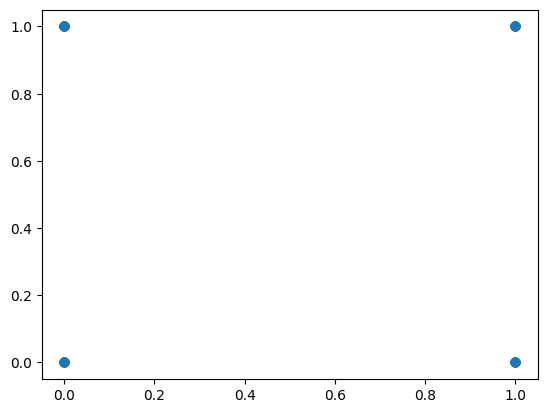